Contient:
- EDA
- Prétraitement
- Modélisations (model/hyper-paramètres/CV)
- Prédictions (performances/évalutations)

Doit intégrer:
- MLFlow de génération du tracking d'expérimentations
- L'interface web 'UI MLFLOW' d'affichage des résultats du tracking MLFLOW (note: conserver des copies d'écran).

# Imports

In [110]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score

In [2]:
pd.options.display.max_rows = 125
pd.options.display.max_columns = 125
sns.set_theme(style="whitegrid")

# Explanatory Data Analysis

In [3]:
path = "Dataset"
df_application_train = pd.read_csv(os.path.join(path,'application_train.csv'))
df_application_test = pd.read_csv(os.path.join(path,'application_test.csv'))
#df_bureau = pd.read_csv(os.path.join(path,'bureau.csv'))
#df_bureau_balance = pd.read_csv(os.path.join(path,'bureau_balance.csv'))
#df_columns_description = pd.read_csv(os.path.join(path,'HomeCredit_columns_description.csv'), sep=',')
#df_installments_payments = pd.read_csv(os.path.join(path,'installments_payments.csv'))
#df_POS_CASH_balance = pd.read_csv(os.path.join(path,'POS_CASH_balance.csv'))
#df_previous_application = pd.read_csv(os.path.join(path,'previous_application.csv'))
#df_sample_submission = pd.read_csv(os.path.join(path,'sample_submission.csv'))

'''all_dfs= {"df_application_train" : df_application_train, 
          "df_application_test" : df_application_test, 
          "df_bureau" : df_bureau, 
          "df_bureau_balance" : df_bureau_balance, 
          #df_columns_description, 
          "df_installments_payments" : df_installments_payments, 
          "df_POS_CASH_balance" : df_POS_CASH_balance, 
          "df_previous_application" : df_previous_application, 
          "df_sample_submission" : df_sample_submission
         }'''

'all_dfs= {"df_application_train" : df_application_train, \n          "df_application_test" : df_application_test, \n          "df_bureau" : df_bureau, \n          "df_bureau_balance" : df_bureau_balance, \n          #df_columns_description, \n          "df_installments_payments" : df_installments_payments, \n          "df_POS_CASH_balance" : df_POS_CASH_balance, \n          "df_previous_application" : df_previous_application, \n          "df_sample_submission" : df_sample_submission\n         }'

In [4]:
'''for key, df in all_dfs.items():
    print(key, df.shape)'''

'for key, df in all_dfs.items():\n    print(key, df.shape)'

Considérant le nombre important de tables, nous allons dans un premier temps nous focaliser sur les deux tables principales (application_train et application_test) pour créer un pipeline de nettoyage, fetaure engineering et modélisation.  
Nous reviendrons par la suite pour ajouter d'autres features provenant d'autres tables.

### application_train

In [5]:
print(df_application_train.shape)
print(df_application_test.shape)
print(f"Taille relative du train set: {round(100*df_application_train.shape[0]/(df_application_train.shape[0]+df_application_test.shape[0]),0)}%")

(307511, 122)
(48744, 121)
Taille relative du train set: 86.0%


In [6]:
df_application_train.head(3).T

,0,1,2
SK_ID_CURR,100002,100003,100004
TARGET,1,0,0
NAME_CONTRACT_TYPE,Cash loans,Cash loans,Revolving loans
CODE_GENDER,M,F,M
FLAG_OWN_CAR,N,N,Y
FLAG_OWN_REALTY,Y,N,Y
CNT_CHILDREN,0,0,0
AMT_INCOME_TOTAL,202500.0,270000.0,67500.0
AMT_CREDIT,406597.5,1293502.5,135000.0
AMT_ANNUITY,24700.5,35698.5,6750.0


**Feature Target**

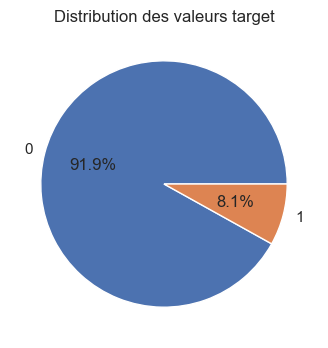

In [7]:
vc_target = df_application_train['TARGET'].value_counts()
plt.figure(figsize=(4,4))
plt.pie(vc_target, labels=vc_target.index, autopct='%1.1f%%')
plt.title('Distribution des valeurs target')
plt.show()

Notre target, avec 91.9% de valeurs 0 et 8.1% de valeurs 1 est clairement inéquilibrée.  
***Action à faire:***  
Nous allons devoir prendre en compte cela dans la modélisation et utiliser des techniquees afin de réduire le déséquilibre des classes.

**Valeurs manquantes**

In [8]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
    
    # Total missing values
    mis_val = df.isnull().sum()
    
    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    
    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    
    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Valeurs manquantes', 1 : '% de Valeurs totales'})
    
    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% de Valeurs totales', ascending=False).round(1)
    
    # Print some summary information
    print ("Le dataframe a " + str(df.shape[1]) + " colonnes.\n"      
            "Il y a " + str(mis_val_table_ren_columns.shape[0]) +
              " colonnes contenant des valeurs manquantes.")
        
    # Return the dataframe with missing information
    return mis_val_table_ren_columns

In [9]:
missing_values = missing_values_table(df_application_train)
missing_values

Le dataframe a 122 colonnes.
Il y a 67 colonnes contenant des valeurs manquantes.


,Valeurs manquantes,% de Valeurs totales
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


Nous nous retrouvons avec un nombre important de valeurs manquantes.  
***Action à faire:***  
Nous allons devoir faire un choix dans notre approche:  
- utiliser des valeurs d'imputation (mean, median, iterativeImputer, KNNImputer)
- utiliser un modèle qui peut gérer les valeurs manquantes (XGBoost)

**Features types**

In [10]:
df_application_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

Nous avons surtout des features numériques (106) dont la target pour 16 feautre catégorielles.

**Valeurs uniques (features catégorielles)**

In [11]:
list_features_categorielles = df_application_train.select_dtypes('object').columns.tolist()
df_application_train.select_dtypes('object').apply(pd.Series.nunique, axis=0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [12]:
def display_value_counts_ameliore(dataframe, feature, disp=True):
    vc = pd.DataFrame(dataframe[feature].value_counts())
    vc['freq.'] = round(100*vc[feature]/vc[feature].sum(),2)
    if disp:
        display('*'*30)
        display(feature, vc)
    return(vc)

for feature in list_features_categorielles:
    display_value_counts_ameliore(df_application_train, feature)

'******************************'

'NAME_CONTRACT_TYPE'

,NAME_CONTRACT_TYPE,freq.
Cash loans,278232,90.48
Revolving loans,29279,9.52


'******************************'

'CODE_GENDER'

,CODE_GENDER,freq.
F,202448,65.83
M,105059,34.16
XNA,4,0.00


'******************************'

'FLAG_OWN_CAR'

,FLAG_OWN_CAR,freq.
N,202924,65.99
Y,104587,34.01


'******************************'

'FLAG_OWN_REALTY'

,FLAG_OWN_REALTY,freq.
Y,213312,69.37
N,94199,30.63


'******************************'

'NAME_TYPE_SUITE'

,NAME_TYPE_SUITE,freq.
Unaccompanied,248526,81.16
Family,40149,13.11
"Spouse, partner",11370,3.71
Children,3267,1.07
Other_B,1770,0.58
Other_A,866,0.28
Group of people,271,0.09


'******************************'

'NAME_INCOME_TYPE'

,NAME_INCOME_TYPE,freq.
Working,158774,51.63
Commercial associate,71617,23.29
Pensioner,55362,18.00
State servant,21703,7.06
Unemployed,22,0.01
Student,18,0.01
Businessman,10,0.00
Maternity leave,5,0.00


'******************************'

'NAME_EDUCATION_TYPE'

,NAME_EDUCATION_TYPE,freq.
Secondary / secondary special,218391,71.02
Higher education,74863,24.34
Incomplete higher,10277,3.34
Lower secondary,3816,1.24
Academic degree,164,0.05


'******************************'

'NAME_FAMILY_STATUS'

,NAME_FAMILY_STATUS,freq.
Married,196432,63.88
Single / not married,45444,14.78
Civil marriage,29775,9.68
Separated,19770,6.43
Widow,16088,5.23
Unknown,2,0.00


'******************************'

'NAME_HOUSING_TYPE'

,NAME_HOUSING_TYPE,freq.
House / apartment,272868,88.73
With parents,14840,4.83
Municipal apartment,11183,3.64
Rented apartment,4881,1.59
Office apartment,2617,0.85
Co-op apartment,1122,0.36


'******************************'

'OCCUPATION_TYPE'

,OCCUPATION_TYPE,freq.
Laborers,55186,26.14
Sales staff,32102,15.21
Core staff,27570,13.06
Managers,21371,10.12
Drivers,18603,8.81
High skill tech staff,11380,5.39
Accountants,9813,4.65
Medicine staff,8537,4.04
Security staff,6721,3.18
Cooking staff,5946,2.82


'******************************'

'WEEKDAY_APPR_PROCESS_START'

,WEEKDAY_APPR_PROCESS_START,freq.
TUESDAY,53901,17.53
WEDNESDAY,51934,16.89
MONDAY,50714,16.49
THURSDAY,50591,16.45
FRIDAY,50338,16.37
SATURDAY,33852,11.01
SUNDAY,16181,5.26


'******************************'

'ORGANIZATION_TYPE'

,ORGANIZATION_TYPE,freq.
Business Entity Type 3,67992,22.11
XNA,55374,18.01
Self-employed,38412,12.49
Other,16683,5.43
Medicine,11193,3.64
Business Entity Type 2,10553,3.43
Government,10404,3.38
School,8893,2.89
Trade: type 7,7831,2.55
Kindergarten,6880,2.24


'******************************'

'FONDKAPREMONT_MODE'

,FONDKAPREMONT_MODE,freq.
reg oper account,73830,75.94
reg oper spec account,12080,12.43
not specified,5687,5.85
org spec account,5619,5.78


'******************************'

'HOUSETYPE_MODE'

,HOUSETYPE_MODE,freq.
block of flats,150503,98.23
specific housing,1499,0.98
terraced house,1212,0.79


'******************************'

'WALLSMATERIAL_MODE'

,WALLSMATERIAL_MODE,freq.
Panel,66040,43.69
"Stone, brick",64815,42.88
Block,9253,6.12
Wooden,5362,3.55
Mixed,2296,1.52
Monolithic,1779,1.18
Others,1625,1.07


'******************************'

'EMERGENCYSTATE_MODE'

,EMERGENCYSTATE_MODE,freq.
No,159428,98.56
Yes,2328,1.44


In [13]:
vc_organization_type = display_value_counts_ameliore(df_application_train, 'ORGANIZATION_TYPE')#, disp=False)

'******************************'

'ORGANIZATION_TYPE'

,ORGANIZATION_TYPE,freq.
Business Entity Type 3,67992,22.11
XNA,55374,18.01
Self-employed,38412,12.49
Other,16683,5.43
Medicine,11193,3.64
Business Entity Type 2,10553,3.43
Government,10404,3.38
School,8893,2.89
Trade: type 7,7831,2.55
Kindergarten,6880,2.24


In [14]:
vc_organization_type.rename(columns={"ORGANIZATION_TYPE":"Count"}, inplace=True)
vc_organization_type['organisation'] = vc_organization_type.index
display(vc_organization_type.head())

,Count,freq.,organisation
Business Entity Type 3,67992,22.11,Business Entity Type 3
XNA,55374,18.01,XNA
Self-employed,38412,12.49,Self-employed
Other,16683,5.43,Other
Medicine,11193,3.64,Medicine


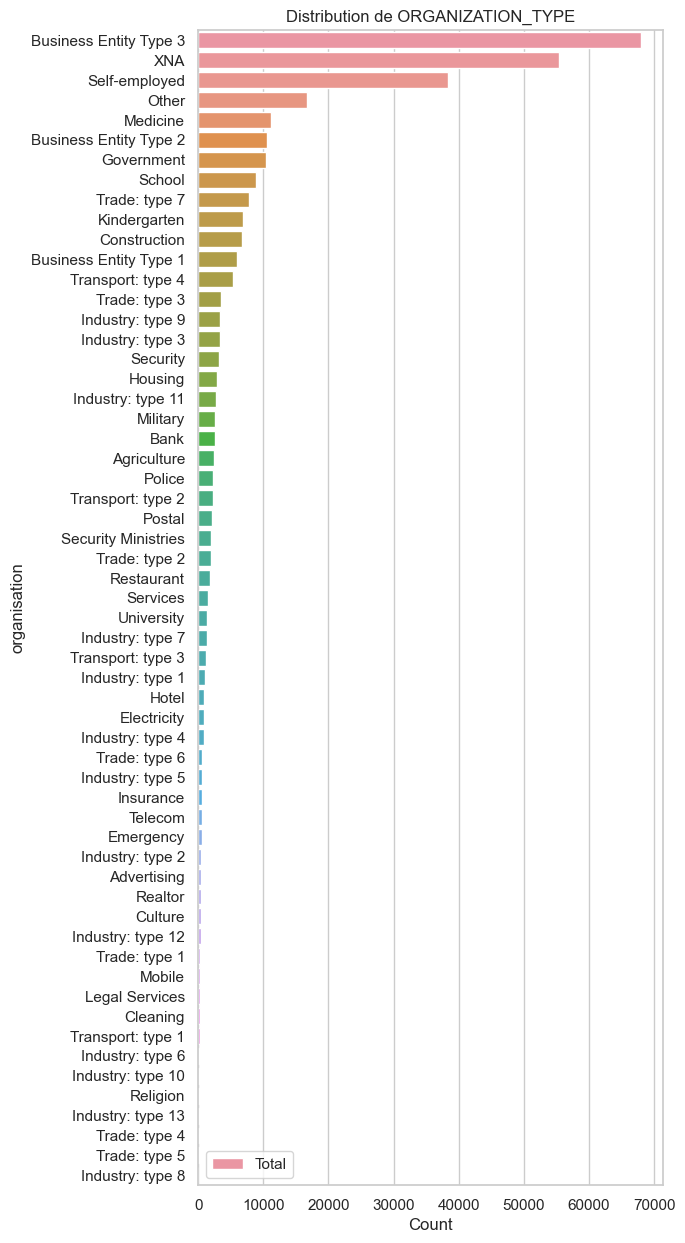

In [15]:
plt.figure(figsize=(6,15))
sns.barplot(x="Count", y="organisation", data=vc_organization_type, label="Total")#, color="b")
plt.title('Distribution de ORGANIZATION_TYPE')
plt.legend()

In [16]:
df_application_train['NAME_TYPE_SUITE'].unique()

array(['Unaccompanied', 'Family', 'Spouse, partner', 'Children',
       'Other_A', nan, 'Other_B', 'Group of people'], dtype=object)

In [17]:
df_application_train['NAME_HOUSING_TYPE'].unique()

array(['House / apartment', 'Rented apartment', 'With parents',
       'Municipal apartment', 'Office apartment', 'Co-op apartment'],
      dtype=object)

<Axes: ylabel='Frequency'>

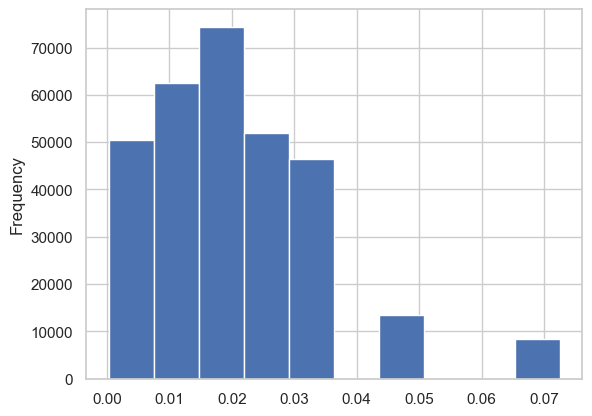

In [18]:
df_application_train['REGION_POPULATION_RELATIVE'].plot.hist()

In [19]:
vc_occupation_type = pd.DataFrame(df_application_train['OCCUPATION_TYPE'].value_counts())
vc_occupation_type['freq.'] = round(100*vc_occupation_type['OCCUPATION_TYPE']/vc_occupation_type['OCCUPATION_TYPE'].sum(),2)
display(vc_occupation_type)

,OCCUPATION_TYPE,freq.
Laborers,55186,26.14
Sales staff,32102,15.21
Core staff,27570,13.06
Managers,21371,10.12
Drivers,18603,8.81
High skill tech staff,11380,5.39
Accountants,9813,4.65
Medicine staff,8537,4.04
Security staff,6721,3.18
Cooking staff,5946,2.82


In [20]:
vc_occupation_type = pd.DataFrame(df_application_train['ORGANIZATION_TYPE'].value_counts())
vc_occupation_type['freq.'] = round(100*vc_occupation_type['ORGANIZATION_TYPE']/vc_occupation_type['ORGANIZATION_TYPE'].sum(),2)
display(vc_occupation_type)

,ORGANIZATION_TYPE,freq.
Business Entity Type 3,67992,22.11
XNA,55374,18.01
Self-employed,38412,12.49
Other,16683,5.43
Medicine,11193,3.64
Business Entity Type 2,10553,3.43
Government,10404,3.38
School,8893,2.89
Trade: type 7,7831,2.55
Kindergarten,6880,2.24


Commentaires:  
- Pour **CODE_GENDER**, nous avons 4 valeurs 'XNA' qui peuvent s'interpréter come non-renseignées ou 'Ne se prononce pas'. Considérant qu'il est possible que les personnes se déclarent non-binaires, nous allons laisser cette variable en l'état.  
- Pour **FAMILY_STATUS**, nous avons 2 valeurs 'Unknown' qui peuvent être interprétées comme non-reseignées ou 'Ne se prononce pas'. Similairement à CODE_GENDER, nous allons laisser cette valeur en l'état.  
- Pour **WEEKDAY_APPR_PROCESS_START**, nous sommes un peu étonné de trouver le dimanche (Sunday), mais il est probable que la demande puisse se faire en ligne, dans quel cas, la valeur est correcte.
- La distribution de **ORGANIZATION_TYPE** est très skewed.

***Action à réaliser:***  
Nous allons One-hot encoder ces variables (avant d'étudier les corrélations à la target). La dimensionnalité agrandie de notre base sera ensuite traitée au travers des prochaines étapes (identification des key features et réduction via PCA).  
Note: pour aligner le train_set et test_set il est possible d'utiliser pandas.DataFrame.align  


In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
le = LabelEncoder()

print("Previous shape:", df_application_train.shape)
for col in df_application_train:
    if df_application_train[col].dtype == 'object':
        print(col)
        print(len(list(df_application_train[col].unique())))
        if len(list(df_application_train[col].unique())) <= 2:
            le.fit(df_application_train[col])
            df_application_train[col] = le.transform(df_application_train[col])
            df_application_test[col] = le.transform(df_application_test[col])

print("In-between shape:", df_application_train.shape)
df_application_train = pd.get_dummies(df_application_train)
df_application_test = pd.get_dummies(df_application_test)
print("New shape:", df_application_train.shape)


Previous shape: (307511, 122)
NAME_CONTRACT_TYPE
2
CODE_GENDER
3
FLAG_OWN_CAR
2
FLAG_OWN_REALTY
2
NAME_TYPE_SUITE
8
NAME_INCOME_TYPE
8
NAME_EDUCATION_TYPE
5
NAME_FAMILY_STATUS
6
NAME_HOUSING_TYPE
6
OCCUPATION_TYPE
19
WEEKDAY_APPR_PROCESS_START
7
ORGANIZATION_TYPE
58
FONDKAPREMONT_MODE
5
HOUSETYPE_MODE
4
WALLSMATERIAL_MODE
8
EMERGENCYSTATE_MODE
3
In-between shape: (307511, 122)
New shape: (307511, 243)


In [23]:
train_labels = df_application_train['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
df_application_train, df_application_test = df_application_train.align(df_application_test, join = 'inner', axis = 1)

# Add the target back in
df_application_train['TARGET'] = train_labels

print('Training Features shape: ', df_application_train.shape)
print('Testing Features shape: ', df_application_test.shape)

Training Features shape:  (307511, 240)
Testing Features shape:  (48744, 239)


**Anomalies**

In [24]:
df_application_train.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.518577,102790.175348,100002.0,189145.5,278202.0,367142.5,456255.0
NAME_CONTRACT_TYPE,307511.0,0.095213,0.293509,0.0,0.0,0.0,0.0,1.0
FLAG_OWN_CAR,307511.0,0.340108,0.473746,0.0,0.0,0.0,1.0,1.0
FLAG_OWN_REALTY,307511.0,0.693673,0.460968,0.0,0.0,1.0,1.0,1.0
CNT_CHILDREN,307511.0,0.417052,0.722121,0.0,0.0,0.0,1.0,19.0
...,...,...,...,...,...,...,...,...
"WALLSMATERIAL_MODE_Stone, brick",307511.0,0.210773,0.407858,0.0,0.0,0.0,0.0,1.0
WALLSMATERIAL_MODE_Wooden,307511.0,0.017437,0.130892,0.0,0.0,0.0,0.0,1.0
EMERGENCYSTATE_MODE_No,307511.0,0.518446,0.499660,0.0,0.0,1.0,1.0,1.0
EMERGENCYSTATE_MODE_Yes,307511.0,0.007570,0.086679,0.0,0.0,0.0,0.0,1.0


In [25]:
(df_application_train['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

L'âge des clients, comprise entre 20ans et 69ans, semble correcte.

In [26]:
(df_application_train['DAYS_EMPLOYED'] / -365).describe()

count    307511.000000
mean       -174.835742
std         387.056895
min       -1000.665753
25%           0.791781
50%           3.323288
75%           7.561644
max          49.073973
Name: DAYS_EMPLOYED, dtype: float64

In [27]:
df_application_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

<Axes: xlabel='DAYS_EMPLOYED', ylabel='Count'>

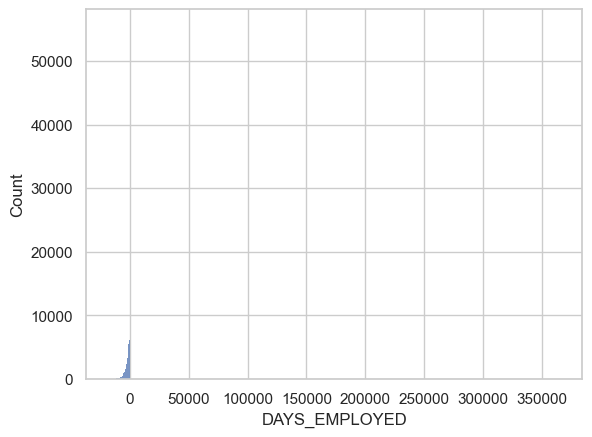

In [28]:
sns.histplot(data=df_application_train, x='DAYS_EMPLOYED')

Nombre de valeurs positives= 55374
(0, 240)


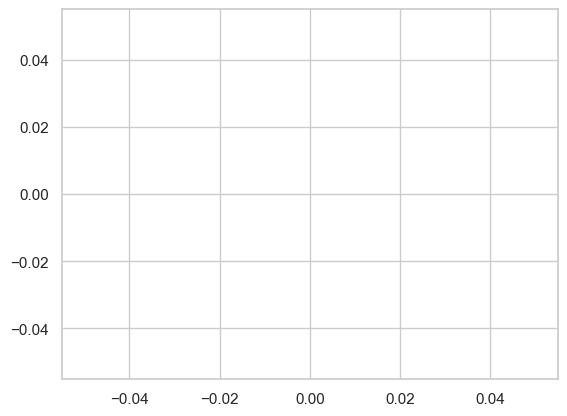

In [29]:
print("Nombre de valeurs positives=",df_application_train.query('DAYS_EMPLOYED > 0').shape[0])
outliers_days_employed = df_application_train.query("DAYS_EMPLOYED > 0 and DAYS_EMPLOYED != 365243")
sns.histplot(data=outliers_days_employed, x='DAYS_EMPLOYED')
print(outliers_days_employed.shape)

In [30]:
outliers_days_employed.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,...,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,FONDKAPREMONT_MODE_not specified,FONDKAPREMONT_MODE_org spec account,FONDKAPREMONT_MODE_reg oper account,FONDKAPREMONT_MODE_reg oper spec account,HOUSETYPE_MODE_block of flats,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,TARGET


Nous nous retrouvons avec 55374 entrées où la valeur DAYS_EMPLOYED est égale à 365243. Cela semble correspondre à une valeur par défaut utilisée lorsqu'il n'y a pas de donnée renseignée.  
***Action à faire:***  
Nous allons donc conserver cela comme une information avec deux opérations:
- passer les valeurs 365243 en np.NaN
- indiquer dans une nouvelle feature booléenne que

In [31]:
df_application_train['DAYS_EMPLOYED_ANOM'] = df_application_train["DAYS_EMPLOYED"] == 365243
df_application_test['DAYS_EMPLOYED_ANOM'] = df_application_test["DAYS_EMPLOYED"] == 365243

df_application_train['DAYS_EMPLOYED'].replace({365243:np.nan}, inplace=True)
df_application_test['DAYS_EMPLOYED'].replace({365243:np.nan}, inplace=True)

In [32]:
#Pour simplifier la compréhension des features DAYS_xxx nous allons les passer en valeur positive:
df_application_train['DAYS_BIRTH'] = - df_application_train['DAYS_BIRTH']
df_application_train['DAYS_EMPLOYED'] = - df_application_train['DAYS_EMPLOYED']
df_application_train['DAYS_REGISTRATION'] = - df_application_train['DAYS_REGISTRATION']
df_application_train['DAYS_ID_PUBLISH'] = - df_application_train['DAYS_ID_PUBLISH']

In [33]:
df_application_train['DAYS_BIRTH'].describe()

count    307511.000000
mean      16036.995067
std        4363.988632
min        7489.000000
25%       12413.000000
50%       15750.000000
75%       19682.000000
max       25229.000000
Name: DAYS_BIRTH, dtype: float64

**Corrélation à la Target et multi-colinéarité**

In [34]:
#On enlève les features catégorielles et on isole la target
df_ex_target_ex_cat = df_application_train[[col for col in df_application_train.columns if col not in list_features_categorielles]]
df_ex_target_ex_cat = df_ex_target_ex_cat.dropna(axis=0)
df_target = df_ex_target_ex_cat['TARGET']
df_ex_target_ex_cat = df_ex_target_ex_cat.drop(columns=['TARGET'])

In [35]:
# Perform feature selection unsing univariate statistical test
from sklearn.feature_selection import SelectKBest
#from sklearn.feature_selection import f_regression # => for regression tasks
from sklearn.feature_selection import f_classif # => for classification tasks

kbest = SelectKBest(score_func=f_classif, k=20)

kbest.fit(df_ex_target_ex_cat, df_target)

#print("Feature selection", kbest.get_support())
#print("Features scores", kbest.scores_)
selected_features = list(df_ex_target_ex_cat.columns[kbest.get_support()])
print("Selected features:", selected_features)

Selected features: ['AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'OWN_CAR_AGE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'FLOORSMAX_AVG', 'FLOORSMAX_MODE', 'FLOORSMAX_MEDI', 'FLAG_DOCUMENT_3', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'NAME_INCOME_TYPE_Working', 'NAME_EDUCATION_TYPE_Higher education', 'NAME_EDUCATION_TYPE_Secondary / secondary special', 'NAME_HOUSING_TYPE_With parents', 'OCCUPATION_TYPE_Laborers', 'ORGANIZATION_TYPE_Transport: type 3']


C:\Users\amcuc\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 12  79 114 116 118 119 211 219 236] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\amcuc\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [36]:
selected_features.append('TARGET')

Text(0.5, 1.0, 'Correlation heatmap des principales features corrélées à la target')

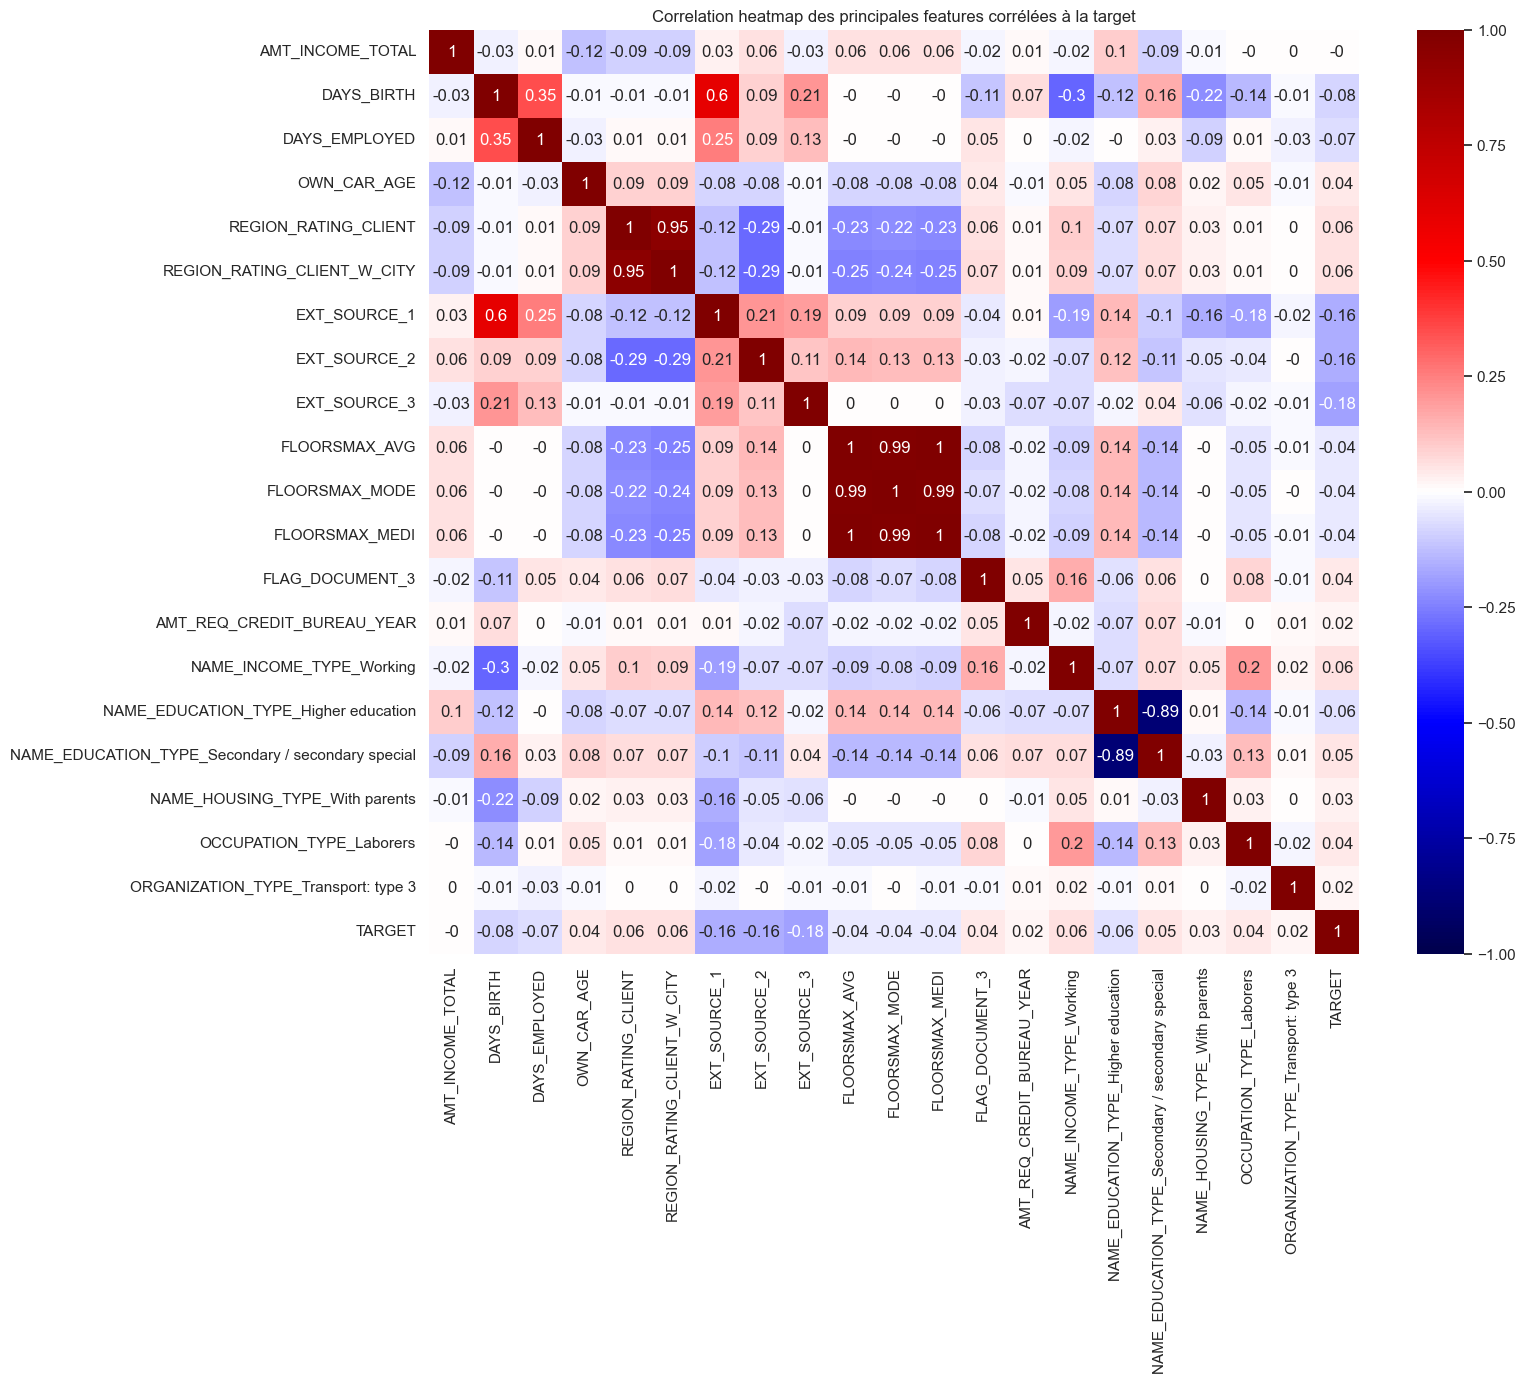

In [37]:
corr = df_application_train[selected_features].corr().round(2)
plt.figure(figsize=(15,12))
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, cmap='seismic')
plt.title("Correlation heatmap des principales features corrélées à la target")

In [38]:
correlations = df_application_train.corr()['TARGET'].sort_values()
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 DEF_30_CNT_SOCIAL_CIRCLE                             0.032248
LIVE_CITY_NOT_WORK_CITY                              0.032518
OWN_CAR_AGE                                          0.037612
OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
TARGET                                               1.000000
Name: TARGET, dtype: float64

Most Negati

Parmi les principales features corrélées (positivement ou négativement) à la target, nous notons une forte multicolinéarité entre les features:  
- 'APARTMENTS_AVG'
- 'ELEVATORS_AVG'
- 'FLOORSMAX_AVG'
- 'FLOORSMIN_AVG'
- 'LIVINGAPARTMENTS_AVG'
- 'FLOORSMAX_MODE'
- 'FLOORSMIN_MODE'
- 'FLOORSMAX_MEDI'
- 'FLOORSMIN_MEDI'
- 'TOTALAREA_MODE
Si nous utilisons toutes ces variables dans le cadre de la modélisation, nous allons augmenter les erreurs-types des coefficients de ces features et les rendre instables.  
Nous rencontrons également ce cas avec les features:
- 'REGION_RATING_CLIENT'
- 'REGION_RATING_CLIENT_W_CITY'  
***Action à faire:***  
- Synthétiser en une feature ces features fortement corrélées?

**Analyse des features les plus corrélées**  
- DAYS_BIRTH -0.078
- EXT_SOURCE_3 -0.179
- EXT_SOURCE_2 -0.160
- EXT_SOURCE_1 -0.155

La corrélation négative de **DAYS_BIRTH** à la target indique que plus la personne vieille et moins elle a de chance de faire défaut. L'âge est ainsi une feature intéressante pour notre analyse.

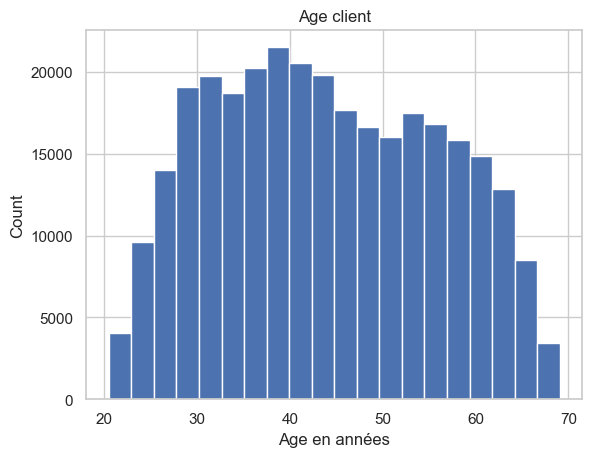

In [39]:
plt.figure()
plt.hist(df_application_train['DAYS_BIRTH']/365.25, bins=20)
plt.title("Age client")
plt.xlabel("Age en années")
plt.ylabel("Count")
plt.show()

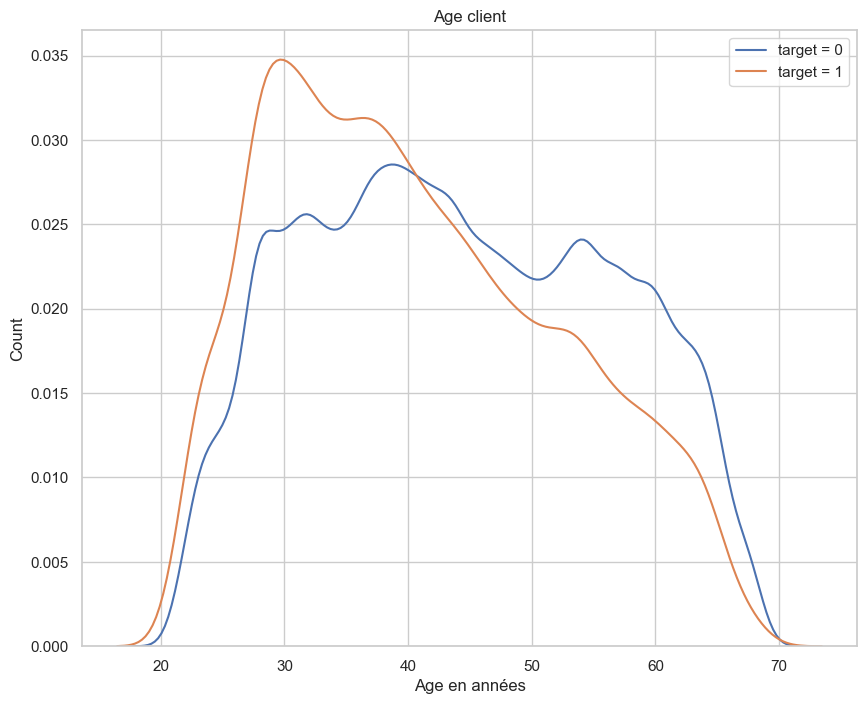

In [40]:
plt.figure(figsize=(10,8))
sns.kdeplot(df_application_train.loc[df_application_train['TARGET'] == 0, 'DAYS_BIRTH']/365.25, label='target = 0')
sns.kdeplot(df_application_train.loc[df_application_train['TARGET'] == 1, 'DAYS_BIRTH']/365.25, label='target = 1')
plt.title("Age client")
plt.xlabel("Age en années")
plt.ylabel("Count")
plt.legend()
plt.show()

Le graphique met en évidence que l'âge de l'individu (bien que de faible corrélation 0.07), influence la target. La courbe de target=1 est positively skewed avec un pic autour des 30ans.  
Pour aller plus loin, il faut regarder le taux de défaut relativement à une classe d'âge, car ici le graphique compte les occurences en absolu.

In [41]:
np.linspace(20,70,11)

array([20., 25., 30., 35., 40., 45., 50., 55., 60., 65., 70.])

In [42]:
#Analyse du taux de défaut par tranche d'âge
age_data = df_application_train[['TARGET','DAYS_BIRTH']].copy()
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH']/365.25
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins=np.linspace(20,70,11))
display(age_data.head(10))


,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.902806,"(25.0, 30.0]"
1,0,16765,45.900068,"(45.0, 50.0]"
2,0,19046,52.145106,"(50.0, 55.0]"
3,0,19005,52.032854,"(50.0, 55.0]"
4,0,19932,54.570842,"(50.0, 55.0]"
5,0,16941,46.381930,"(45.0, 50.0]"
6,0,13778,37.722108,"(35.0, 40.0]"
7,0,18850,51.608487,"(50.0, 55.0]"
8,0,20099,55.028063,"(55.0, 60.0]"
9,0,14469,39.613963,"(35.0, 40.0]"


In [43]:
age_groups = age_data.groupby(by=['YEARS_BINNED']).mean()
display(age_groups)

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.122946,8536.397286,23.371382
"(25.0, 30.0]",0.111280,10161.525688,27.820741
"(30.0, 35.0]",0.102695,11863.320752,32.480002
"(35.0, 40.0]",0.089637,13716.573041,37.553930
"(40.0, 45.0]",0.078332,15506.340775,42.454047
"(45.0, 50.0]",0.074191,17335.189953,47.461163
"(50.0, 55.0]",0.066720,19210.717576,52.596078
"(55.0, 60.0]",0.055358,21000.639708,57.496618
"(60.0, 65.0]",0.052827,22797.766180,62.416882


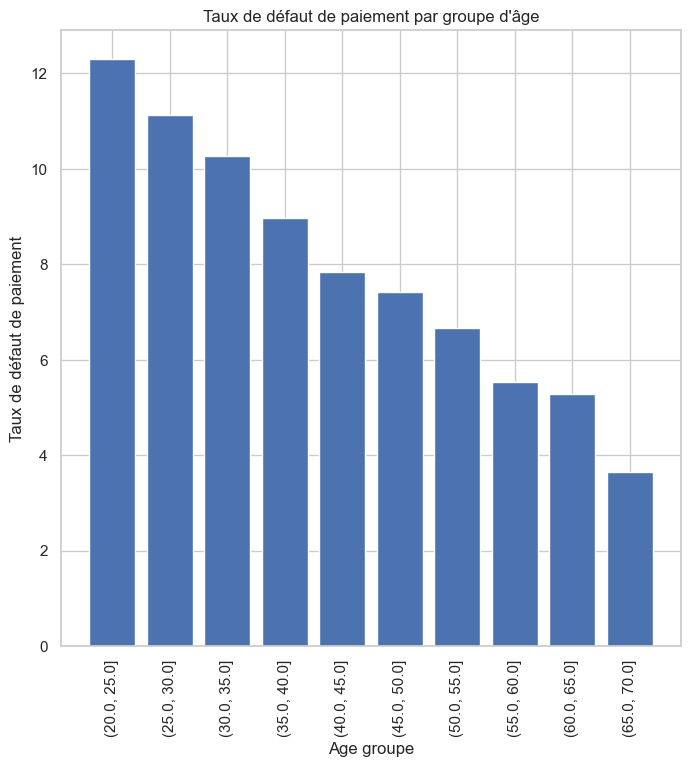

In [44]:
plt.figure(figsize=(8,8))
plt.bar(age_groups.index.astype(str), 100*age_groups['TARGET'])
plt.xticks(rotation=90)
plt.xlabel('Age groupe')
plt.ylabel("Taux de défaut de paiement")
plt.title("Taux de défaut de paiement par groupe d'âge")
plt.show()

Cette analyse met en évidence que les populations plus jeunes ont plus de risques de défaut de paiement. Cette information est donc très importante pour notre modélisation.

In [45]:
ext_data = df_application_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
corr_ext_data = ext_data.corr().round(3)
display(corr_ext_data)

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000,-0.155,-0.160,-0.179,-0.078
EXT_SOURCE_1,-0.155,1.000,0.214,0.187,0.601
EXT_SOURCE_2,-0.160,0.214,1.000,0.109,0.092
EXT_SOURCE_3,-0.179,0.187,0.109,1.000,0.205
DAYS_BIRTH,-0.078,0.601,0.092,0.205,1.000


<Axes: >

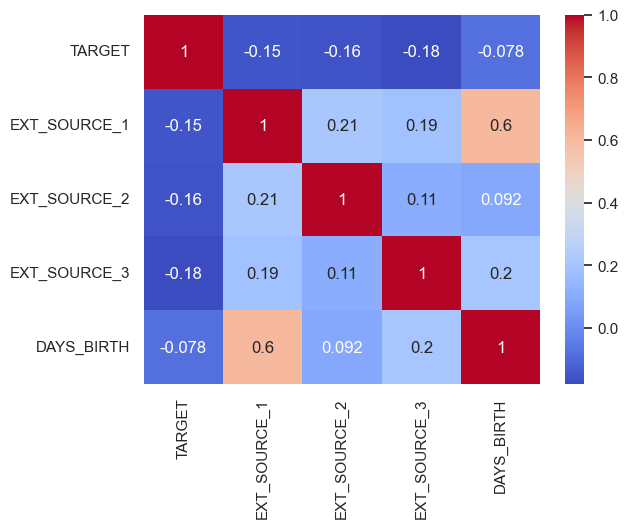

In [46]:
sns.heatmap(corr_ext_data, cmap = "coolwarm",annot=True)

In [47]:
ext_data.loc[ext_data['TARGET']==0,'EXT_SOURCE_1']

1         0.311267
2              NaN
3              NaN
4              NaN
5              NaN
            ...   
307505         NaN
307506    0.145570
307507         NaN
307508    0.744026
307510    0.734460
Name: EXT_SOURCE_1, Length: 282686, dtype: float64

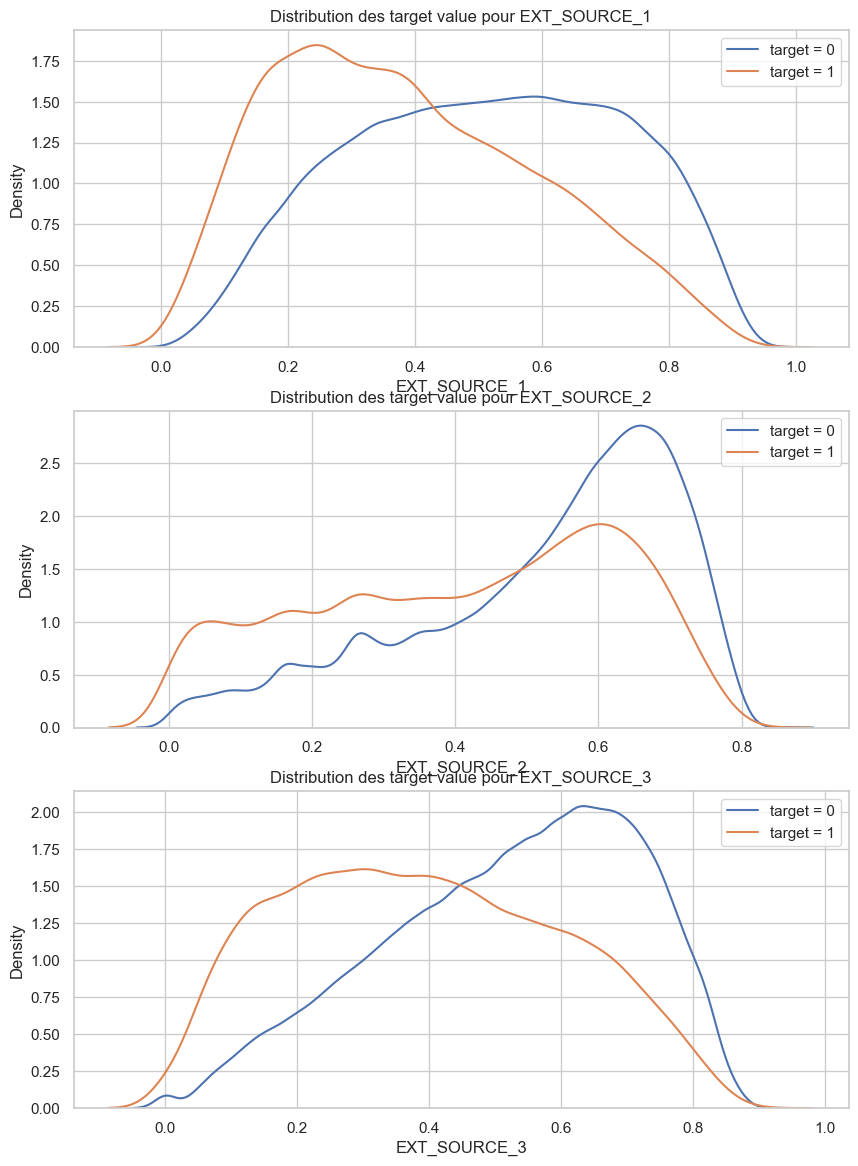

In [48]:
plt.figure(figsize=(10,14))

for i, feat in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    plt.subplot(3, 1, i + 1)
    sns.kdeplot(ext_data.loc[ext_data['TARGET']==0,feat], label="target = 0")
    sns.kdeplot(ext_data.loc[ext_data['TARGET']==1,feat], label="target = 1")
    plt.title(f"Distribution des target value pour {feat}")
    plt.legend()

Les courbes pour EXT_SOURCE_3 sont les plus différentiantes avec des skewness presque opposées.

**Data leakage**

Considérant l'analyse précédente de corrélation à la target, nous savons déjà qu'il n'y a aucune feature fortement corrélée à notre target.  
L'analyse manuel des features de ces bases (applicaiton_train/test) ne relève aucun cas direct de data leakage. En revanche, nous pouvons nous questionner quant aux features EXT_SOURCE_1, EXT_SOURCE_2 et EXT_SOURCE_3 car nous ne pouvons pas être sûr à 100% qu'ils n'intègrent pas la feature target dans leru modélisation.

# Feature engineering

**Polynomial features**

In [49]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, IterativeImputer
from sklearn.preprocessing import PolynomialFeatures

In [50]:
poly_features = df_application_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
poly_features_test = df_application_test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

In [51]:
poly_features.shape

(307511, 4)

In [52]:
#KNN Imputer semble le choix plus conservateur
#imputer = KNNImputer(n_neighbors=3)
#poly_features = imputer.fit_transform(poly_features)
iterative_imputer = IterativeImputer(missing_values=np.nan)
poly_features = iterative_imputer.fit_transform(poly_features)
poly_features_test = iterative_imputer.transform(poly_features_test)

In [53]:
poly_transformer = PolynomialFeatures(degree=3)
poly_features = poly_transformer.fit_transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)

In [54]:
poly_features.shape

(307511, 35)

In [55]:
poly_transformer.get_feature_names_out(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])

array(['1', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH',
       'EXT_SOURCE_1^2', 'EXT_SOURCE_1 EXT_SOURCE_2',
       'EXT_SOURCE_1 EXT_SOURCE_3', 'EXT_SOURCE_1 DAYS_BIRTH',
       'EXT_SOURCE_2^2', 'EXT_SOURCE_2 EXT_SOURCE_3',
       'EXT_SOURCE_2 DAYS_BIRTH', 'EXT_SOURCE_3^2',
       'EXT_SOURCE_3 DAYS_BIRTH', 'DAYS_BIRTH^2', 'EXT_SOURCE_1^3',
       'EXT_SOURCE_1^2 EXT_SOURCE_2', 'EXT_SOURCE_1^2 EXT_SOURCE_3',
       'EXT_SOURCE_1^2 DAYS_BIRTH', 'EXT_SOURCE_1 EXT_SOURCE_2^2',
       'EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3',
       'EXT_SOURCE_1 EXT_SOURCE_2 DAYS_BIRTH',
       'EXT_SOURCE_1 EXT_SOURCE_3^2',
       'EXT_SOURCE_1 EXT_SOURCE_3 DAYS_BIRTH',
       'EXT_SOURCE_1 DAYS_BIRTH^2', 'EXT_SOURCE_2^3',
       'EXT_SOURCE_2^2 EXT_SOURCE_3', 'EXT_SOURCE_2^2 DAYS_BIRTH',
       'EXT_SOURCE_2 EXT_SOURCE_3^2',
       'EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH',
       'EXT_SOURCE_2 DAYS_BIRTH^2', 'EXT_SOURCE_3^3',
       'EXT_SOURCE_3^2 DAYS_BIRTH', 'EXT_SOURCE_3 DAYS_BIR

In [56]:
poly_features = pd.DataFrame(poly_features,columns=poly_transformer.get_feature_names_out(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']))
poly_features['TARGET'] = df_application_train['TARGET']

In [57]:
corr_poly_feat = poly_features.corr()['TARGET'].sort_values()

In [58]:
corr_poly_feat

EXT_SOURCE_2 EXT_SOURCE_3                -0.195460
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.187661
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH     -0.180693
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.177153
EXT_SOURCE_1 EXT_SOURCE_3                -0.176023
EXT_SOURCE_1 EXT_SOURCE_2                -0.174721
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.174065
EXT_SOURCE_3                             -0.164677
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.161446
EXT_SOURCE_2                             -0.160341
EXT_SOURCE_1 EXT_SOURCE_3^2              -0.159661
EXT_SOURCE_1^2 EXT_SOURCE_3              -0.157965
EXT_SOURCE_2 DAYS_BIRTH                  -0.156893
EXT_SOURCE_1^2 EXT_SOURCE_2              -0.156525
EXT_SOURCE_3 DAYS_BIRTH                  -0.152689
EXT_SOURCE_1 EXT_SOURCE_2 DAYS_BIRTH     -0.150409
EXT_SOURCE_3^2                           -0.149779
EXT_SOURCE_2^2                           -0.149547
EXT_SOURCE_2^2 DAYS_BIRTH                -0.149326
EXT_SOURCE_1 EXT_SOURCE_3 DAYS_

Avec cette technique de polynomial featuring nous avons pu créer de nouvelles fatures mieux corrélées.  
**Critique:** L'augmentation de corrélation reste limitée (.179 =>.194) et nous avons finalement augmenté la dimensionalité de notre dataset.

In [59]:
df_application_train.head(2)

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,...,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,FONDKAPREMONT_MODE_not specified,FONDKAPREMONT_MODE_org spec account,FONDKAPREMONT_MODE_reg oper account,FONDKAPREMONT_MODE_reg oper spec account,HOUSETYPE_MODE_block of flats,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,TARGET,DAYS_EMPLOYED_ANOM
0,100002,0,0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,9461,637.0,3648.0,2120,NaN,1,1,0,1,1,0,1.0,2,2,10,0,0,0,0,0,0,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,1,False
1,100003,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,16765,1188.0,1186.0,291,NaN,1,1,0,1,1,0,2.0,1,1,11,0,0,0,0,0,0,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,False


In [60]:
# test features en df
poly_features_test = pd.DataFrame(poly_features_test, columns=poly_transformer.get_feature_names_out(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']))

# merge des features polynomial dans le train_set
poly_features.drop(columns=['TARGET'], inplace=True)
poly_features['SK_ID_CURR'] = df_application_train['SK_ID_CURR']
df_application_train_poly = df_application_train.merge(poly_features, on='SK_ID_CURR', how='left')

# merge des features polynomial dans le test_set
poly_features_test['SK_ID_CURR'] = df_application_test['SK_ID_CURR']
df_application_test_poly = df_application_test.merge(poly_features_test, on='SK_ID_CURR', how='left')

# Alignement de df
df_application_train_poly, df_application_test_poly = df_application_train_poly.align(df_application_test_poly, join='inner', axis=1)

# Print les nouvelles shapes
print('Training data with polynomial features shape: ', df_application_train_poly.shape)
print('Testing data with polynomial features shape:  ', df_application_test_poly.shape)

Training data with polynomial features shape:  (307511, 275)
Testing data with polynomial features shape:   (48744, 275)


In [61]:
cols = df_application_train_poly.columns.tolist()

In [62]:
display(cols)

['SK_ID_CURR',
 'NAME_CONTRACT_TYPE',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH_x',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1_x',
 'EXT_SOURCE_2_x',
 'EXT_SOURCE_3_x',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG

**Connaissance métier**

In [63]:
df_application_train_metier = df_application_train.copy()
df_application_test_metier = df_application_test.copy()

# train
df_application_train_metier['CREDIT_INCOME_PERCENT'] = df_application_train_metier['AMT_CREDIT'] / df_application_train_metier['AMT_INCOME_TOTAL']
df_application_train_metier['ANNUITY_INCOME_PERCENT'] = df_application_train_metier['AMT_ANNUITY'] / df_application_train_metier['AMT_INCOME_TOTAL']
df_application_train_metier['CREDIT_TERM'] = df_application_train_metier['AMT_ANNUITY'] / df_application_train_metier['AMT_CREDIT']
df_application_train_metier['DAYS_EMPLOYED_PERCENT'] = df_application_train_metier['DAYS_EMPLOYED'] / df_application_train_metier['DAYS_BIRTH']

# test
df_application_test_metier['CREDIT_INCOME_PERCENT'] = df_application_test_metier['AMT_CREDIT'] / df_application_test_metier['AMT_INCOME_TOTAL']
df_application_test_metier['ANNUITY_INCOME_PERCENT'] = df_application_test_metier['AMT_ANNUITY'] / df_application_test_metier['AMT_INCOME_TOTAL']
df_application_test_metier['CREDIT_TERM'] = df_application_test_metier['AMT_ANNUITY'] / df_application_test_metier['AMT_CREDIT']
df_application_test_metier['DAYS_EMPLOYED_PERCENT'] = df_application_test_metier['DAYS_EMPLOYED'] / df_application_test_metier['DAYS_BIRTH']


In [64]:
df_application_train_metier[['DAYS_EMPLOYED','DAYS_BIRTH']].head()

,DAYS_EMPLOYED,DAYS_BIRTH
0,637.0,9461
1,1188.0,16765
2,225.0,19046
3,3039.0,19005
4,3038.0,19932


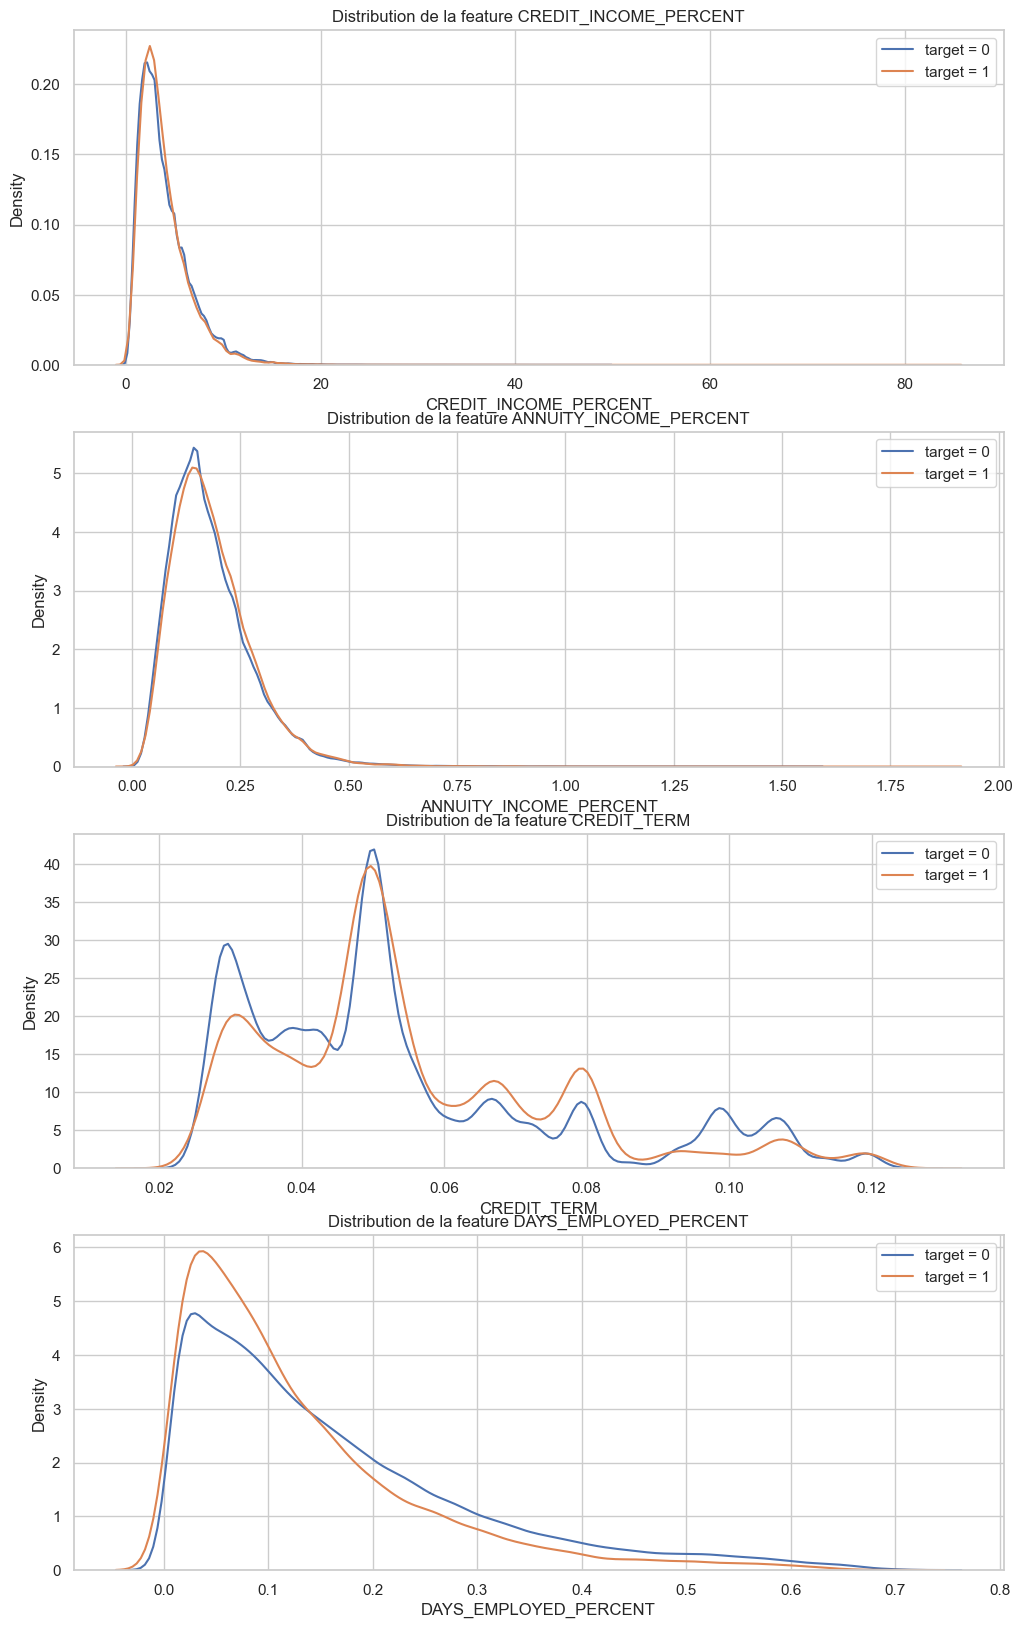

In [65]:
plt.figure(figsize=(12,20))

for i, feature in enumerate(['CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']):
    plt.subplot(4,1,i+1)
    sns.kdeplot(df_application_train_metier.loc[df_application_train_metier['TARGET']==0, feature], label='target = 0')
    sns.kdeplot(df_application_train_metier.loc[df_application_train_metier['TARGET']==1, feature], label='target = 1')
    plt.title(f'Distribution de la feature {feature}')
    plt.legend()
plt.show()

CREDIT_INCOME_PERCENT et ANNUITE_INCOME_PERCENT semble avoir un comportement similaire tant pour les targets à 0 que les targets à 1. Il est fort à penser qu'elles auront une valeur discriminante faible.  
ANNUITY_INCOME_PERCENTE et CREDIT_TERM quant à elles semblent avoir une certaine explicabilité, bien que faible.


# Modélisation
Nous utiliserons une prédiction à 0.5 comme baseline modèle.

In [66]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

## Préparation des train et test set

In [67]:
if 'TARGET' in df_application_train:
    train = df_application_train.drop(columns = ['TARGET'])
else:
    train = df_application_train.copy()

train, test = train.align(df_application_test, join='inner', axis=1)

features = list(train.columns)

# Copie des données du test set
test = df_application_test.copy()

# Imputation par la médiane des valeurs manquantes
imputer = SimpleImputer(strategy = 'median')
imputer.fit(train)
train = imputer.transform(train)
test = imputer.transform(df_application_test)

# Scaling des target
scaler = MinMaxScaler(feature_range = (0, 1))
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

Training data shape:  (307511, 240)
Testing data shape:  (48744, 240)


## LogisticRegression

In [68]:
from sklearn.linear_model import LogisticRegression

In [69]:
log_reg = LogisticRegression(C = 0.0001)

# Train on the training data
log_reg.fit(train, train_labels)

LogisticRegression(C=0.0001)

In [70]:
# Prédictions
log_reg_pred = log_reg.predict_proba(test)

In [71]:
# Probabilité de prédire un défaut
log_reg_pred[:,1]

array([0.08158055, 0.14757492, 0.08943897, ..., 0.08094108, 0.08574267,
       0.10960507])

In [72]:
# Submission dataframe
submit = df_application_test[['SK_ID_CURR']]
submit['TARGET'] = log_reg_pred[:,1]

submit.head()

C:\Users\amcuc\AppData\Local\Temp\ipykernel_19252\1654845564.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submit['TARGET'] = log_reg_pred[:,1]


,SK_ID_CURR,TARGET
0,100001,0.081581
1,100005,0.147575
2,100013,0.089439
3,100028,0.087759
4,100038,0.144155


In [73]:
# Sauvagerde en csv
submit.to_csv('log_reg_baseline.csv', index = False)

## Random Forest Classifier

In [74]:
from sklearn.ensemble import RandomForestClassifier

In [75]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=50, verbose=1, n_jobs=-1)
random_forest.fit(train, train_labels)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   23.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.0min finished


RandomForestClassifier(n_jobs=-1, random_state=50, verbose=1)

In [76]:
# Extraction des feature importances
feature_importance_values = random_forest.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

# Prédictions
rfc_predictions = random_forest.predict_proba(test)[:, 1]

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.2s finished


In [77]:
feature_importances.sort_values(by='importance', ascending=False, inplace=True)
display(feature_importances)

,feature,importance
32,EXT_SOURCE_2,4.954645e-02
33,EXT_SOURCE_3,4.678322e-02
10,DAYS_BIRTH,3.200323e-02
13,DAYS_ID_PUBLISH,3.190507e-02
12,DAYS_REGISTRATION,3.147998e-02
...,...,...
84,FLAG_DOCUMENT_4,3.492625e-07
117,NAME_INCOME_TYPE_Businessman,0.000000e+00
15,FLAG_MOBIL,0.000000e+00
90,FLAG_DOCUMENT_10,0.000000e+00


**Calcul de l'accuracy sur la train**

In [79]:
# Make a submission dataframe
submit = df_application_test[['SK_ID_CURR']]
submit['TARGET'] = rfc_predictions

# Save the submission dataframe
submit.to_csv('random_forest_baseline.csv', index = False)

C:\Users\amcuc\AppData\Local\Temp\ipykernel_19252\3212186151.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submit['TARGET'] = rfc_predictions


**Test sur les features engineered à la modélisation**

In [80]:
poly_features_names = list(df_application_train_poly.columns)

In [83]:
# Imputation des valeurs manquantes
imputer = SimpleImputer(strategy = 'median')
poly_features = imputer.fit_transform(df_application_train_poly)
poly_features_test = imputer.transform(df_application_test_poly)

# Scaling
scaler = MinMaxScaler(feature_range = (0, 1))
poly_features = scaler.fit_transform(poly_features)
poly_features_test = scaler.transform(poly_features_test)

random_forest_poly = RandomForestClassifier(n_estimators=100, random_state=50, verbose=1, n_jobs=-1)

In [84]:
# Fit sur le train set
random_forest_poly.fit(poly_features, train_labels)

# Predict
predictions = random_forest_poly.predict_proba(poly_features_test)[:,1]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   29.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.3min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.2s finished


In [85]:
predictions

array([0.41, 0.48, 0.44, ..., 0.3 , 0.34, 0.51])

In [88]:
# Make a submission dataframe
submit = df_application_test[['SK_ID_CURR']]
submit['TARGET'] = predictions

# Save the submission dataframe
submit.to_csv('random_forest_baseline_engineered.csv', index = False)

C:\Users\amcuc\AppData\Local\Temp\ipykernel_19252\3537969340.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submit['TARGET'] = predictions


**Test sur les features métiers à la modélisation**

In [90]:
df_application_train_metier.drop(columns="TARGET", inplace=True)

In [96]:
metier_features_names = list(df_application_train_metier.columns)

In [93]:
# Imputation des valeurs manquantes
imputer = SimpleImputer(strategy = 'median')
metier_features = imputer.fit_transform(df_application_train_metier)
metier_features_test = imputer.transform(df_application_test_metier)

# Scaling
scaler = MinMaxScaler(feature_range = (0, 1))
metier_features = scaler.fit_transform(metier_features)
metier_features_test = scaler.transform(metier_features_test)

random_forest_metier = RandomForestClassifier(n_estimators=100, random_state=50, verbose=1, n_jobs=-1)

In [94]:
# Train sur le train set
random_forest_metier.fit(metier_features, train_labels)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   24.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.1min finished


RandomForestClassifier(n_jobs=-1, random_state=50, verbose=1)

In [97]:
# Extraction des feature importances
feature_importance_values_metier = random_forest_metier.feature_importances_
feature_importances_metier = pd.DataFrame({'feature': metier_features_names, 'importance': feature_importance_values_metier})

In [98]:
# Predict
predictions = random_forest_metier.predict_proba(metier_features_test)[:, 1]

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.2s finished


In [99]:
# Make a submission dataframe
submit = df_application_test[['SK_ID_CURR']]
submit['TARGET'] = predictions

# Save the submission dataframe
submit.to_csv('random_forest_baseline_metier.csv', index = False)

C:\Users\amcuc\AppData\Local\Temp\ipykernel_19252\237511106.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submit['TARGET'] = predictions


In [100]:
df_check = pd.read_csv('random_forest_baseline_metier.csv')

In [101]:
df_check.head()

,SK_ID_CURR,TARGET
0,100001,0.31
1,100005,0.34
2,100013,0.27
3,100028,0.22
4,100038,0.30


In [ ]:
df_application_test

In [103]:
true_values = df_application_train['TARGET']

In [104]:
true_values.shape

(307511,)

In [107]:
predictions_train = random_forest_metier.predict_proba(metier_features)[:, 1]

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    4.4s finished


In [116]:
predictions_train = pd.DataFrame(predictions_train, columns=["prediction"])
predictions_train['Prediction0_1'] = predictions_train['prediction'].map(lambda x:0 if x<.5 else 1)

In [120]:
true_values.nunique()

2

In [121]:
accuracy_score(true_values, predictions_train['Prediction0_1'])

0.9999772365866587

Pour être rigoriste, nous devrions spliter le train set en train set et validation set afin de pouvoir apprécier l'overfit. Ici, visiblement la prédiction est correcte dans quasiment 100% des cas... Difficle à croire que le modèle soit parfait sur un jeu de données test. (Pour rappel, nous n'avons pas de valeur target pour le test set qui nous a été fourni donc nous ne savons pas utiliser ce dernier).

**Model interpretation: Features Importances**

In [123]:
def plot_feature_importances(df):
    """
    Plot importances returned by a model. This can work with any measure of
    feature importance provided that higher importance is better. 
    
    Args:
        df (dataframe): feature importances. Must have the features in a column
        called `features` and the importances in a column called `importance
        
    Returns:
        shows a plot of the 15 most importance features
        
        df (dataframe): feature importances sorted by importance (highest to lowest) 
        with a column for normalized importance
        """
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))), 
            df['importance_normalized'].head(15), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    
    return df

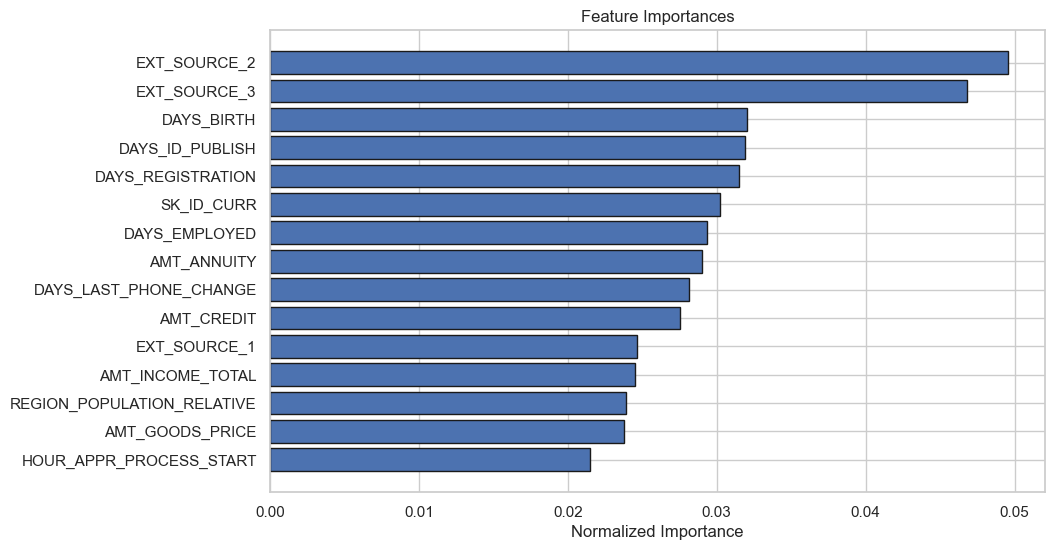

In [124]:
feature_importances_sorted = plot_feature_importances(feature_importances)

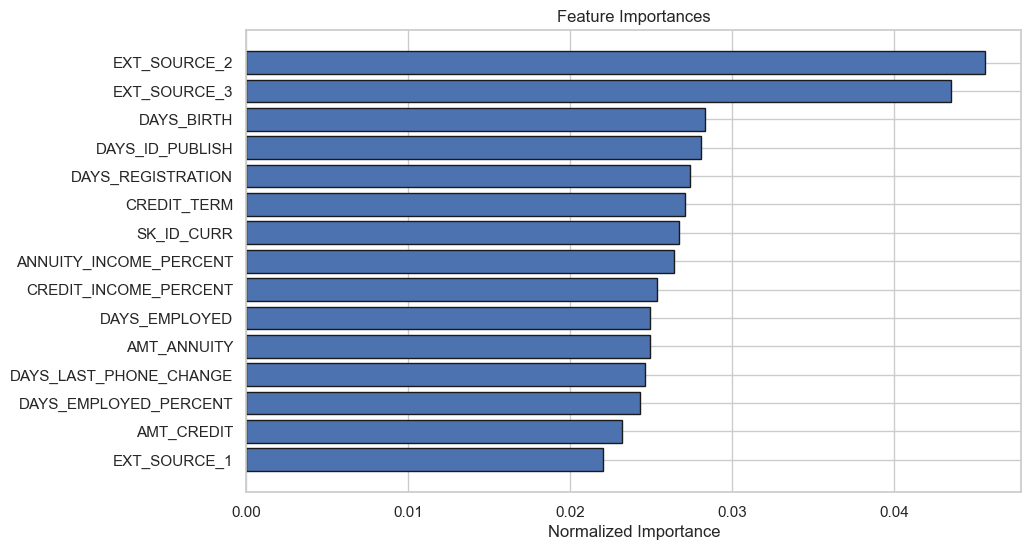

In [126]:
feature_importances_domain_sorted = plot_feature_importances(feature_importances_metier)